In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
# Load the CSV into a DataFrame
file_path = "/home/betty/Desktop/Becode_training_path/Projects/Data_analysis/csv-data/cleaned_dataset_analysis (2).csv" 
df = pd.read_csv(file_path)

In [15]:
#Dataframe description:
rows_and_cols = df.shape
print(rows_and_cols)
col_names = df.columns.to_list()
print(col_names)


(10701, 27)
['Locality', 'Zip Code', 'Province', 'Type of Property', 'Subtype of Property', 'Price', 'Number of Rooms', 'Livable Space (m2)', 'Fully Equipped Kitchen', 'Furnished', 'Open Fire', 'Terrace', 'Terrace Area (m2)', 'Garden', 'Garden Area (m2)', 'Swimming Pool', 'Surface of the Land (m2)', 'Number of Facades', 'PEB', 'Primary Energy Consumption (kWh/m2)', 'State of the Building', 'State of the Building_Numeric', 'PEB_Numeric', 'Province_Numeric', 'Type of Property_Numeric', 'Subtype of Property_Grouped', 'Subtype of Property_Grouped_Numeric']


In [16]:
# Count the number of qualitative and quantitative variables
qualitative_vars = df.select_dtypes(include='object').shape[1]
quantitative_vars = df.select_dtypes(include=['int64', 'float64']).shape[1]
print(f"Qualitative variables: {qualitative_vars}")
print(f"Quantitative variables: {quantitative_vars}")

# Sort and group the dtypes
dtypes_sorted = df.dtypes.sort_values()
# Print them grouped by type
for dtype in dtypes_sorted.unique():
    print(f"{dtype}:\n")
    print(dtypes_sorted[dtypes_sorted == dtype], "\n")

Qualitative variables: 7
Quantitative variables: 20
int64:

Garden                                 int64
Type of Property_Numeric               int64
Province_Numeric                       int64
PEB_Numeric                            int64
State of the Building_Numeric          int64
Swimming Pool                          int64
Terrace                                int64
Open Fire                              int64
Furnished                              int64
Subtype of Property_Grouped_Numeric    int64
Livable Space (m2)                     int64
Zip Code                               int64
Fully Equipped Kitchen                 int64
dtype: object 

float64:

Number of Rooms                        float64
Terrace Area (m2)                      float64
Garden Area (m2)                       float64
Price                                  float64
Surface of the Land (m2)               float64
Number of Facades                      float64
Primary Energy Consumption (kWh/m2)    float64


### To calculate correlation:
- Correlation requires numerical (quantitative) variables.
- Categorical variables (e.g., gender, color) cannot be directly used unless encoded numerically.
- The number of observations for both variables must be equal.
- While the actual units of the variables do not matter for correlation, the data should ideally not contain extreme differences in scale (e.g., comparing millimeters to kilometers) unless standardized.
- Outliers can heavily influence correlation calculations, especially for Pearson correlation.


In [17]:
selected_columns = [
    'Number of Rooms', 'Surface of the Land (m2)', 
    'Number of Facades','Primary Energy Consumption (kWh/m2)', 
    'Livable Space (m2)', 'Terrace Area (m2)', 'Garden Area (m2)',    
    'Fully Equipped Kitchen', 'Furnished', 'Open Fire', 'Swimming Pool'    
    ]  


Price                                  1.000000
Livable Space (m2)                     0.579641
Number of Rooms                        0.434417
Swimming Pool                          0.296429
Surface of the Land (m2)               0.226565
Number of Facades                      0.216231
Garden Area (m2)                       0.106653
Open Fire                              0.101063
Terrace Area (m2)                      0.068747
Furnished                              0.016898
Fully Equipped Kitchen                 0.009892
Primary Energy Consumption (kWh/m2)   -0.020052
Name: Price, dtype: float64


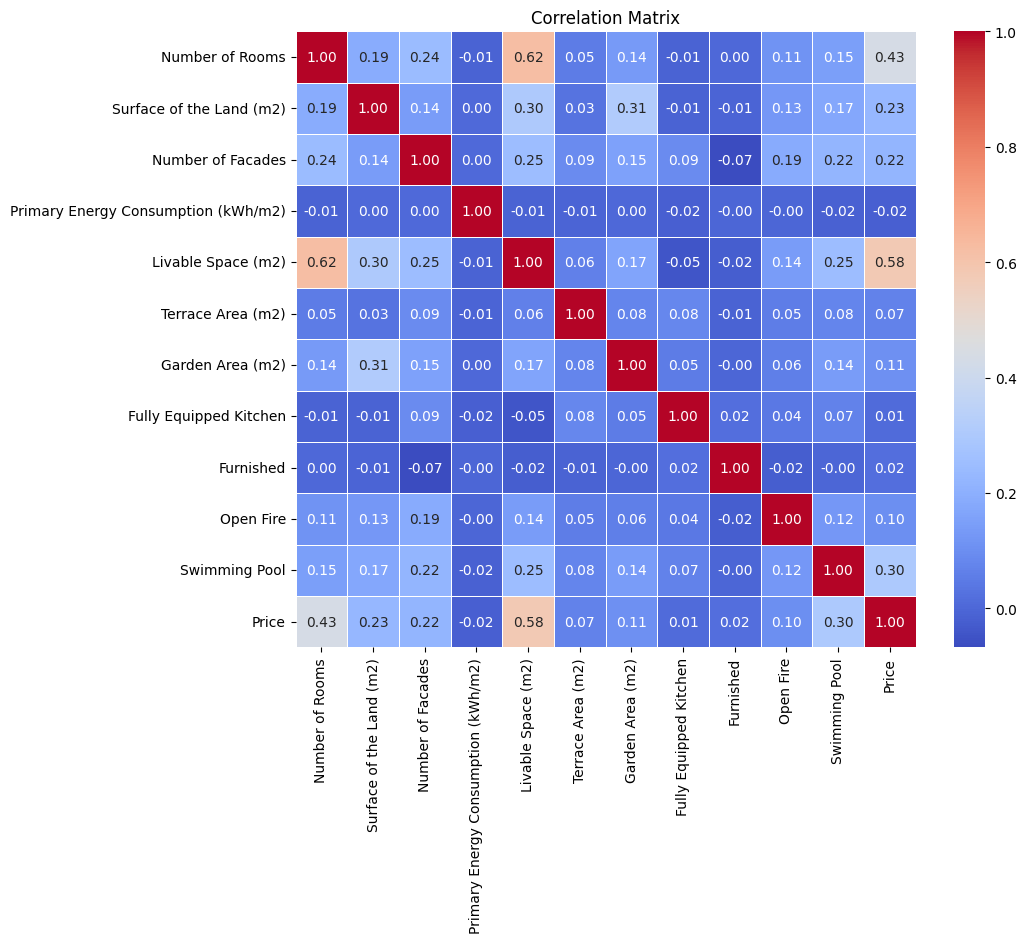

In [18]:
# Calculate the correlation matrix for the selected columns and 'Price'
correlations = df[selected_columns + ['Price']].corr()
correlation_with_price = correlations['Price'].sort_values(ascending=False)
print(correlation_with_price)

# Create a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title('Correlation Matrix')
plt.show()

The closer the correlation value is to +1 or -1, the stronger the relationship between the two variables.

**Variables with the greatest influence on the price:**
- Livable Space (m2): Correlation = 0.579641
This has the strongest positive correlation with the price, meaning as the livable space increases, the price tends to increase as well.
- Number of Rooms: Correlation = 0.434417
A relatively strong positive correlation, indicating that more rooms generally correlate with a higher price.
- Subtype of Property_Grouped_Numeric: Correlation = 0.382021
This variable has a moderate positive correlation with price, indicating that the type or category of the property affects the price to some extent.


**Variables with the least influence on the price:**
- Province_Numeric: Correlation = -0.094847
This has the weakest (and negative) correlation, meaning the province or location (as represented by this numeric variable) has little to no influence on the price.
- Primary Energy Consumption (kWh/m2): Correlation = -0.020052
This also has a very weak negative correlation, indicating that energy consumption has almost no influence on price.
- PEB_Numeric: Correlation = -0.014787
Like energy consumption, the PEB (performance evaluation or energy rating) also has a very weak negative correlation with price, implying that it has little to no effect.


**Conclusions:**
Greatest influence: Livable Space (m2), Number of Rooms, and Subtype of Property_Grouped_Numeric are the most strongly correlated with price.
Least influence: Province_Numeric, Primary Energy Consumption (kWh/m2), and PEB_Numeric have the weakest correlations, suggesting they have minimal impact on price.

## Conclusions:

### Strong Positive Correlations (≥ 0.5):

 **Livable Space (m²)**: 
- Moderate positive correlation: As the livable space increases, the price tends to increase. This is a relatively strong predictor of price compared to the other variables.
- Likely a significant factor in determining property prices, indicating that buyers value larger livable spaces.
- Many tax systems base property taxes on assessed value, which often depends on the size of the livable space. A strong correlation between price and livable space implies that properties with larger livable areas are likely taxed higher due to their higher assessed value.

### Moderate Positive Correlations (0.3 to 0.5):

 **Number of Rooms**: More rooms are generally associated with higher prices. This makes sense with the previous statement and it is a prove of a well-cleaned dataset
 **Swimming Pool**: Having a swimming pool modestly increases property prices.

### Weak Positive Correlations (0.1 to 0.3):

 **Surface of the Land (m²)**:
- Weak positive correlation: Larger land plots have a minor but positive impact on price.
- This could mean that buyers are willing to pay more for properties with more land, but the influence is less than the living space.

**Number of Facades**:
- Weak positive correlation: Properties with more facades might be slightly more valuable, however, the impact on price is minimal.

**Garden Area (m²)**: 
- Very weak positive correlation: While a garden may be a selling point, its size has a negligible direct impact on price

### Negligible Correlations (-0.1 to 0.1):

**Terrace Area (m²)**:
- Very weak positive correlation: A terrace might have some appeal, but its size has virtually no impact on price in this dataset.

**Furnished**: Furnishing status has almost no effect.

**Fully Equipped Kitchen**: A fully equipped kitchen barely correlates with price.


